In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import datasets

In [126]:
# Chargement du dataset IRIS
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Extraction des attributs
X = iris["data"]
y = iris["target"]
target_names = iris["target_names"]

# affectation de chaque atrtribut (sépales + petal) 
sepal_length = X[:, 0]
sepal_width = X[:, 1]
petal_length = X[:, 2]

In [127]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

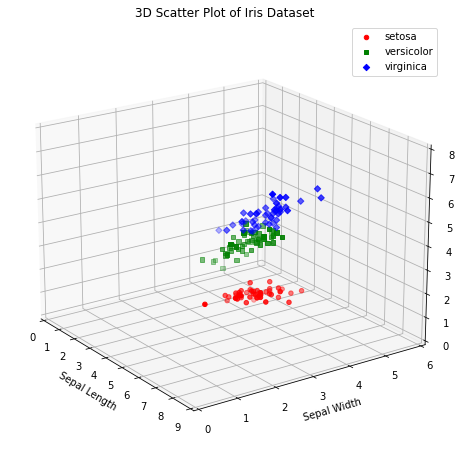

In [128]:
# Création de la figure + axe 3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

# Couleurs pour chaque espèce d'Iris
colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']
# Points pour chaque espèce
for i, (color, marker) in enumerate(zip(colors, markers)):
    indices = np.where(y == i)
    ax.scatter(sepal_length[indices],
                sepal_width[indices],
               petal_length[indices], 
                c=color,
                marker=marker, 
                label=target_names[i])

# Définition des étiquettes des axes et le titre
ax.legend()
ax.set_xlim(0, 9)
ax.set_ylim(0, 6)
ax.set_zlim(0, 8)
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Iris Dataset')
ax.view_init(elev=20., azim=-35, roll=0)

plt.show()

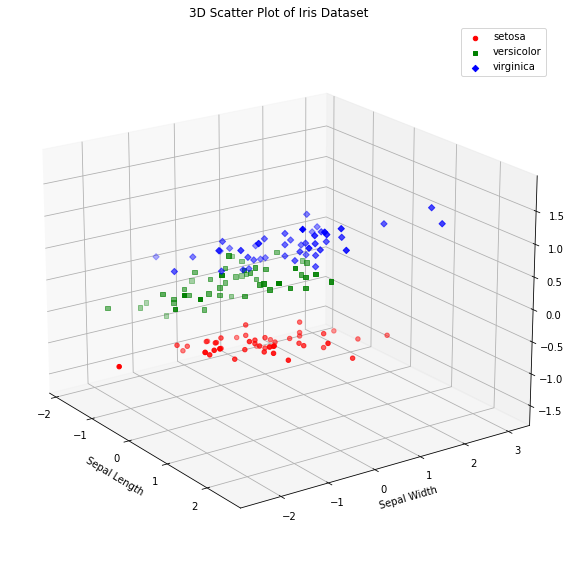

In [129]:
# Centrer et réduire les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

# affectation de chaque attribut (sépales + petal) 
sepal_length = data_scaled[:, 0]
sepal_width = data_scaled[:, 1]
petal_length = data_scaled[:, 2]

# Création de la figure + axe 3D avec les données centrés et réduis
fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(right=1)
ax = fig.add_subplot(111, projection='3d')

# Couleurs pour chaque espèce d'Iris
colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']
# Points pour chaque espèce
for i, (color, marker) in enumerate(zip(colors, markers)):
    indices = np.where(y == i)
    ax.scatter(sepal_length[indices],
                sepal_width[indices],
               petal_length[indices], 
                c=color,
                marker=marker, 
                label=target_names[i])

# Définition des étiquettes des axes et le titre
ax.legend()
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Iris Dataset')
ax.view_init(elev=20., azim=-35, roll=0)

plt.show()

In [130]:
# Réduction de dimensionnalité en PCA
pca = PCA(n_components=2)  # Réduction en 2 dimensions
X_pca = pca.fit_transform(X)

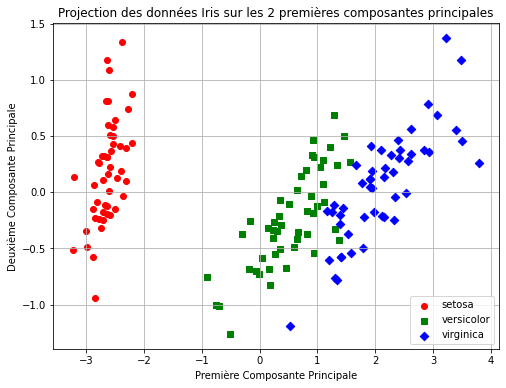

In [131]:
# Représentation de la réduction de dimensions 
plt.figure(figsize=(8, 6))

# Couleur des points en fonction de leurs vrais labels pour voir la séparation des classes (clusters)
for label, color, marker, target_name in zip(np.unique(iris["target"]), ['r', 'g', 'b'], markers, iris["target_names"]):
    plt.scatter(X_pca[iris["target"] == label, 0],  # Coordonnées x des points avec le label actuel
                X_pca[iris["target"] == label, 1],  # Coordonnées y des points avec le label actuel
                marker=marker,
                color=color,
                label=target_name)

plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.title('Projection des données Iris sur les 2 premières composantes principales')
plt.legend()
plt.grid(True)
plt.show()

In [132]:
# Avec standardisation (centrées, réduites)
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)  # Réduction en 2 dimensions
X_pca = pca.fit_transform(X_standard)

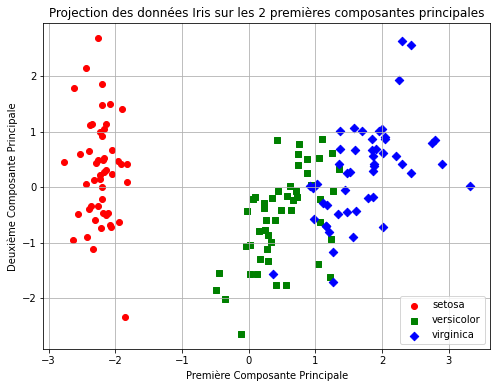

In [133]:
plt.figure(figsize=(8, 6))

# Couleur des points en fonction de leurs vrais labels afin de voir la séparation des classes
for label, color, marker, target_name in zip(np.unique(iris["target"]), ['r', 'g', 'b'], markers, iris["target_names"]):
    plt.scatter(X_pca[iris["target"] == label, 0],  # Coordonnées x des points avec le label actuel
                X_pca[iris["target"] == label, 1],  # Coordonnées y des points avec le label actuel
                color=color,
                marker=marker,
                label=target_name)

plt.xlabel('Première Composante Principale')
plt.ylabel('Deuxième Composante Principale')
plt.title('Projection des données Iris sur les 2 premières composantes principales')
plt.legend()
plt.grid(True)
plt.show()

In [134]:
# Matrice de corrélation des variables
df = pd.DataFrame(X, columns=iris["feature_names"])
correlation_matrix = df.iloc[:, 0:3].corr()
correlation_matrix_full = df.corr()

In [135]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [136]:
correlation_matrix

,sepal length (cm),sepal width (cm),petal length (cm)
sepal length (cm),1.000000,-0.11757,0.871754
sepal width (cm),-0.117570,1.00000,-0.428440
petal length (cm),0.871754,-0.42844,1.000000


In [137]:
correlation_matrix_full

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


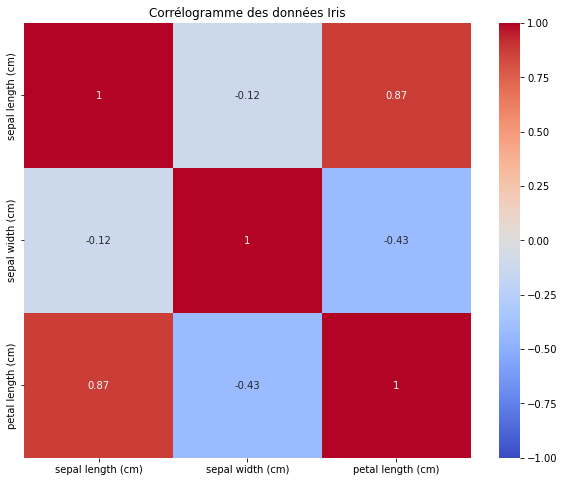

In [138]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,      # Affiche les valeurs de corrélation
            cmap="coolwarm", # Choix de la palette de couleurs
            vmin=-1,         # Fixe la valeur minimale de la barre de couleurs à -1
            vmax=1)          # Fixe la valeur maximale de la barre de couleurs à 1
plt.title('Corrélogramme des données Iris')
plt.show()

In [139]:
# Liste des différentes caractéristiques (variables) de chaque type d'iris
feature_names = iris.feature_names

# matrice de corrélations bivariées (avec numpy)
corr_matrix = np.corrcoef(X, rowvar=False)

In [140]:
# Matrice de corrélation
df = pd.DataFrame(X, columns=feature_names)
corr_matrix = df.corr()

x = []
y = []
size = []
color = []

for i, feature1 in enumerate(feature_names):
    for j, feature2 in enumerate(feature_names):
        x.append(feature1)
        y.append(feature2)
        size.append(abs(corr_matrix.iloc[i, j]) * 100)  # Multiplier par 100 pour ajuster la taille des bulles
        color.append(corr_matrix.iloc[i, j])

# Bubble Chart avec plotly.graph_objects
fig = go.Figure(data=go.Scatter(
    x=x,
    y=y,
    mode='markers',
    marker=dict(
        size=size,
        color=color,
        colorscale='Viridis',
        sizemode='diameter',
        showscale=True
    ),
    text=np.around(color, 2)
))

fig.update_layout(
    title='Bubble Chart des corrélations entre les variables du dataset IRIS',
    xaxis_title='Variable',
    yaxis_title='Variable',
    yaxis_autorange='reversed',  # Inverser l'axe des ordonnées pour une meilleure lisibilité
    hovermode='closest'
)

fig.show()

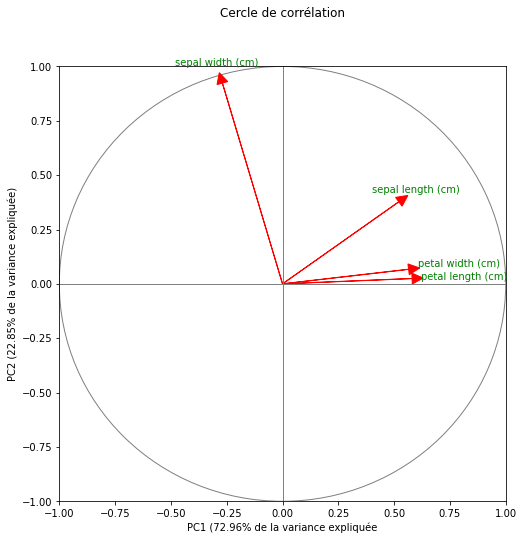

In [141]:
# Cercle de corrélation
fig, ax = plt.subplots(figsize=(8, 8))

# Limiter les axes au cercle de rayon 1
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axvline(0, color='grey', lw=1)
ax.axhline(0, color='grey', lw=1)

# Affichage du cercle
circle = plt.Circle((0, 0), 1, color='grey', fill=False)
ax.add_artist(circle)

# Affichage des vecteurs correspandant aux caractéristiques de chaque classe d'iris.
ax.arrow(
    0, 0, 
    pca.components_[0, 0], 
    pca.components_[1, 0], 
    head_width=0.05, 
    head_length=0.05, 
    fc='red', ec='red')

ax.text(
    pca.components_[0, 0]*1.15, 
    pca.components_[1, 0]*1.15, 
    df_iris.columns[0], 
    color='green', ha='center', va='center')

ax.arrow(
    0, 0, 
    pca.components_[0, 1], 
    pca.components_[1, 1], 
    head_width=0.05, 
    head_length=0.05, 
    fc='red', ec='red')

ax.text(
    pca.components_[0, 1]*1.10, 
    pca.components_[1, 1]*1.10, 
    df_iris.columns[1], 
    color='green', ha='center', va='center')

ax.arrow(
    0, 0, 
    pca.components_[0, 2], 
    pca.components_[1, 2], 
    head_width=0.05, 
    head_length=0.05, 
    fc='red', ec='red')

ax.text(
    pca.components_[0, 2]*1.40, 
    pca.components_[1, 2]*1.40, 
    df_iris.columns[2], 
    color='green', ha='center', va='center')

ax.arrow(
    0, 0, 
    pca.components_[0, 3], 
    pca.components_[1, 3], 
    head_width=0.05, 
    head_length=0.05, 
    fc='red', ec='red')

ax.text(
    pca.components_[0, 3]*1.40, 
    pca.components_[1, 3]*1.40, 
    df_iris.columns[3], 
    color='green', ha='center', va='center')


plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} de la variance expliquée')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} de la variance expliquée)')
#ax.set_xlabel('PC1')
#ax.set_ylabel('PC2')
ax.set_title("Cercle de corrélation", y=1.10)
plt.show()

Les variables petal width et petal length sont fortement corrélées entre elles et sur la 1ère composante principale mais mal représentées (norme = 0.5). La caractéristique sepal width est corrélée à la deuxième composante dont elle est très bien représentée (norme = 1).

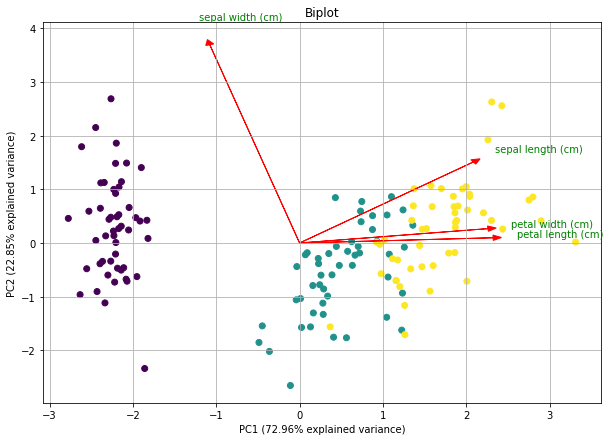

In [143]:
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)  # scatter plot des scores (observations)

# Ajouter les vecteurs de charge pour chaque variable
for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, x * 4, y * 4, head_width=0.1, head_length=0.1, fc='r', ec='r')
    plt.text(x * 4.5, y * 4.5, iris.feature_names[i], color='g')

plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} explained variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} explained variance)')
plt.title('Biplot')
plt.grid()
plt.show()

73 % de la variance des variables (features) est représentée sur la 1er composante principale et 23 % sur la deuxième composante. Soit un total de 96 % de la variance est représentée sur ces seules composantes


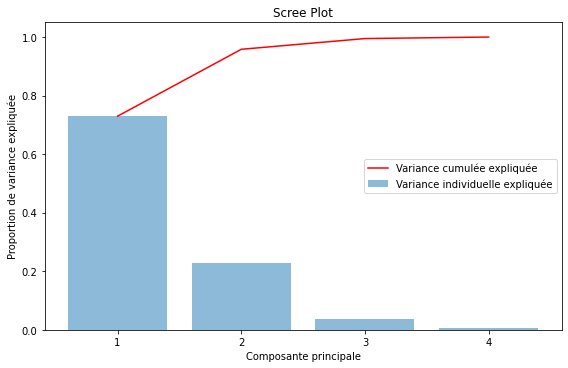

In [144]:
# Proportion de la variance selon le nombre de composantes principales 
pca = PCA()
X_pca = pca.fit_transform(X_standard)

# Nombre de variable
p = X.shape[1] + 1
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Variance individuelle expliquée')
#plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Variance cumulée expliquée')
plt.plot(np.arange(1, p), np.cumsum(explained_variance_ratio), label='Variance cumulée expliquée', color="red")
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1, step=1))
plt.ylabel('Proportion de variance expliquée')
plt.xlabel('Composante principale')
plt.legend(loc='best')
plt.tight_layout()
plt.title('Scree Plot')
plt.show()

In [145]:
num_components = np.arange(1, len(pca.explained_variance_) + 1)
eigenvalues = pca.explained_variance_
explained_variance = pca.explained_variance_ratio_ * 100  # Pourcentage
cumulative_variance = np.cumsum(explained_variance)      # Variance cumulée en pourcentage

# Création du tableau
df = pd.DataFrame({
    'Composante': num_components,
    'Eigenvalue': eigenvalues.round(4),
    '% Variance': explained_variance.round(4),
    'Variance Cumulée (%)': cumulative_variance.round(2)
})


In [146]:
df

,Composante,Eigenvalue,% Variance,Variance Cumulée (%)
0,1,2.9381,72.9624,72.96
1,2,0.9202,22.8508,95.81
2,3,0.1477,3.6689,99.48
3,4,0.0209,0.5179,100.00


Les valeurs propres (eigenvalues) donnent la proportion de la variance représentée sur chaque composante. Plus le coefficient augmente plus la proportion de la variance expliquée augmente (% variance).

In [147]:
# Facteurs de charge
loadings = pca.components_
df_loadings = pd.DataFrame(loadings.T, columns=[f"PC{i+1}" for i in range(loadings.shape[0])], index=iris.feature_names)
df_loadings

,PC1,PC2,PC3,PC4
sepal length (cm),0.521066,0.377418,-0.719566,-0.261286
sepal width (cm),-0.269347,0.923296,0.244382,0.123510
petal length (cm),0.580413,0.024492,0.142126,0.801449
petal width (cm),0.564857,0.066942,0.634273,-0.523597


- Quelle est pour la CP1, la variable qui présente la saturation la plus forte ?
La variable petal length présente le facteur de charge le plus élevé (0.58)

- Quel lien pouvez-vous effectuer avec le cercle des corrélations vu précédemment ?
Ce facteur représente la norme du vecteur sur le cercle de corrélation représentant ainsi la variance exprimée sur la composante principale dont elle est le plus corrélée (CP1).  

In [148]:
# Facteur de charge max par composante
fc_max = {}
for col in df_loadings.columns:
    max_loading_feature = df_loadings[col].idxmax()
    max_loading_value = df_loadings[col].max()
    fc_max[col] = max_loading_feature
df = pd.DataFrame(fc_max, index=['Variable']).T

In [149]:
df

,Variable
PC1,petal length (cm)
PC2,sepal width (cm)
PC3,petal width (cm)
PC4,petal length (cm)


- Quel lien effectuez-vous entre saturation des variables et l’orientation des flèches représentant des vecteurs pour chaque variable ?
Lorsque la saturation des variables est positive la valeur des variables augmente avec leur composante principale ou les autres variables.  

- Expliquez ce que signifie, au juste, la qualité de la représentation d’une variable par une ACP.
La qualité d'une variable représentée par une ACP est définie par la valeur de sa charge et la corrélation avec sa composante principale.

In [150]:
# Calcule du cos carré
cos2 = loadings**2

# Calculer la contribution de chaque variable
eigenvalues = pca.explained_variance_
contributions = cos2 / eigenvalues.reshape(-1, 1)

# Afficher le cos carré et la contribution
df_cos2 = pd.DataFrame(cos2.T, columns=[f"PC{i+1}" for i in range(cos2.shape[0])], index=iris.feature_names)
df_contributions = pd.DataFrame(contributions.T, columns=[f"PC{i+1}" for i in range(contributions.shape[0])], index=iris.feature_names)

print("Cos carré pour chaque variable :\n", df_cos2)
print("\nContribution de chaque variable :\n", df_contributions)

Cos carré pour chaque variable :
                         PC1       PC2       PC3       PC4
sepal length (cm)  0.271510  0.142444  0.517776  0.068271
sepal width (cm)   0.072548  0.852475  0.059722  0.015255
petal length (cm)  0.336879  0.000600  0.020200  0.642321
petal width (cm)   0.319063  0.004481  0.402302  0.274154

Contribution de chaque variable :
                         PC1       PC2       PC3        PC4
sepal length (cm)  0.092410  0.154803  3.504598   3.273759
sepal width (cm)   0.024692  0.926437  0.404235   0.731501
petal length (cm)  0.114659  0.000652  0.136724  30.801052
petal width (cm)   0.108596  0.004870  2.723006  13.146436


La valeur du cos2 représente la qualité de la représentation de la variable par une composante. La contribution représente  l'importance de la variable dans la formation de la composante c'est à dire à quel point elle participe à sa variance (inertie).

In [151]:
myMap = plt.get_cmap('winter')

Algorithme Kmeans


In [152]:
df = pd.DataFrame({'clusters': labels, 'target': iris.target})
pd.crosstab(df["clusters"], df["target"])

target,0,1,2
clusters,,,
0,0,2,36
1,50,0,0
2,0,48,14


In [153]:
# Réduction sur 2 dimensions
# Avec standardisation (centrées, réduites)
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standard)

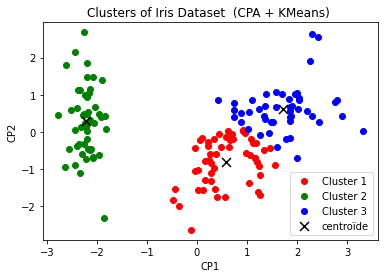

In [168]:
# Initialisation du model Kmeans à 3 clusters
model = KMeans(n_clusters=3, n_init=10)
clusters = model.fit_predict(X_pca)

# Définition des coordonnées et des centroïdes
centroids = model.cluster_centers_
xs = X_pca[:,0]
ys = X_pca[:,1]
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

# Scatter plot pour chaque cluster
for i, color, label in zip(range(3), ['red', 'green', 'blue'], ['Cluster 1', 'Cluster 2', 'Cluster 3']):
    plt.scatter(xs[clusters == i], ys[clusters == i], color=color, label=label)

plt.scatter(centroids_x, centroids_y, c="black", label="centroïde", marker="x", s=80)
plt.title('Clusters of Iris Dataset  (CPA + KMeans) ')
plt.xlabel("CP1")
plt.ylabel("CP2")
plt.legend()

plt.show()